## **TASK 1 **

In [1]:
X = input("Enter first string: ")
Y = input("Enter second string: ")

Enter first string: intension
Enter second string: execution


In [2]:
n = len(X)
m = len(Y)



D = []


for i in range(n+1):
    row = []
    for j in range(m+1):
        row.append(0)
    D.append(row)

for i in range(n+1):
    D[i][0] = i

for j in range(m+1):
    D[0][j] = j

for i in range(1, n+1):
    for j in range(1, m+1):
        if X[i-1] == Y[j-1]:
            cost = 0
        else:
            cost = 2
        D[i][j] = min(
            D[i-1][j] + 1,
            D[i][j-1] + 1,
            D[i-1][j-1] + cost
        )


In [3]:
print("DP Table:")
for row in D:
    print(' '.join(f"{val:2}" for val in row))

distance = D[n][m]
print("\nMinimum Edit Distance:", distance)


DP Table:
 0  1  2  3  4  5  6  7  8  9
 1  2  3  4  5  6  7  6  7  8
 2  3  4  5  6  7  8  7  8  7
 3  4  5  6  7  8  7  8  9  8
 4  3  4  5  6  7  8  9 10  9
 5  4  5  6  7  8  9 10 11 10
 6  5  6  7  8  9 10 11 12 11
 7  6  7  8  9 10 11 10 11 12
 8  7  8  9 10 11 12 11 10 11
 9  8  9 10 11 12 13 12 11 10

Minimum Edit Distance: 10


In [4]:
similarity = 1 - float(distance)/max(n, m)
print("Similarity Score (0 to 1):", similarity)

Similarity Score (0 to 1): -0.11111111111111116


### **TASK2**

In [5]:
!pip install nltk
import nltk
nltk.download('brown')
nltk.download('punkt')
from collections import Counter
from nltk.corpus import brown
from nltk import bigrams, trigrams

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
BOS = "<s>"
EOS = "</s>"


sents = [[BOS] + [w.lower() for w in sent] + [EOS] for sent in brown.sents()]


words = [w for sent in sents for w in sent]
print("Total tokens (with BOS/EOS):", len(words))


unigram_counts = Counter(words)


bigram_counts = Counter()
trigram_counts = Counter()
for sent in sents:
    bigram_counts.update(bigrams(sent))
    trigram_counts.update(trigrams(sent))

V = len(unigram_counts)
print("Vocabulary size:", V)



def bigram_prob(w1, w2):

    count = bigram_counts.get((w1, w2), 0) + 1
    total = unigram_counts.get(w1, 0) + V
    return count / total

def trigram_prob(w1, w2, w3):

    count = trigram_counts.get((w1, w2, w3), 0) + 1
    total = bigram_counts.get((w1, w2), 0) + V
    return count / total

Total tokens (with BOS/EOS): 1275872
Vocabulary size: 49817


In [7]:

def sentence_probability(sentence, n=2):
    toks = sentence.lower().split()
    if not toks:
        return 0.0


    seq = [BOS] + toks + [EOS]

    prob = 1.0
    if n == 2:
        for a, b in bigrams(seq):
            prob *= bigram_prob(a, b)
    elif n == 3:
        for a, b, c in trigrams(seq):
            prob *= trigram_prob(a, b, c)
    else:
        raise ValueError("n must be 2 or 3")
    return prob


In [8]:
def predict_next_word(prefix, n=2, topk=5):
    toks = prefix.lower().split()
    if n == 2:

        last = toks[-1] if toks else BOS
        cands = []
        denom = unigram_counts.get(last, 0) + V

        for (w1, w2), c in bigram_counts.items():
            if w1 == last:
                cands.append((w2, (c + 1) / denom))

        if not cands:
            cands = [(EOS, 1.0 / V)]
        cands.sort(key=lambda x: x[1], reverse=True)
        return cands[:topk]

    elif n == 3:

        if len(toks) < 2:
            return []
        last_two = (toks[-2], toks[-1])
        cands = []
        denom = bigram_counts.get(last_two, 0) + V
        for (w1, w2, w3), c in trigram_counts.items():
            if (w1, w2) == last_two:
                cands.append((w3, (c + 1) / denom))
        if not cands:
            cands = [(EOS, 1.0 / V)]
        cands.sort(key=lambda x: x[1], reverse=True)
        return cands[:topk]

    else:
        return []

In [9]:
def main():
    while True:
        print("\nMenu:")
        print("1. Predict Next Word")
        print("2. Calculate Sentence Probability")
        print("3. Exit")
        choice = input("Enter choice: ").strip()

        if choice == "1":
            sent = input("Enter a sentence (prefix): ").strip()
            try:
                n = int(input("Use bigram (2) or trigram (3)? ").strip())
            except ValueError:
                print("Please enter 2 or 3.")
                continue
            preds = predict_next_word(sent, n=n)
            print("Predictions:", preds)

        elif choice == "2":
            sent = input("Enter a sentence: ").strip()
            try:
                n = int(input("Use bigram (2) or trigram (3)? ").strip())
            except ValueError:
                print("Please enter 2 or 3.")
                continue
            p = sentence_probability(sent, n=n)
            print("Probability:", p)

        elif choice == "3":
            break
        else:
            print("Invalid choice.")

if __name__ == "__main__":
    main()


Menu:
1. Predict Next Word
2. Calculate Sentence Probability
3. Exit
Enter choice: 1
Enter a sentence (prefix): i am a
Use bigram (2) or trigram (3)? 2
Predictions: [('few', 0.005149838382731605), ('little', 0.004136306360598258), ('new', 0.0038075932723387936), ('man', 0.003793896893661316), ('good', 0.003232345367884731)]

Menu:
1. Predict Next Word
2. Calculate Sentence Probability
3. Exit
Enter choice: 1
Enter a sentence (prefix): i am a
Use bigram (2) or trigram (3)? 3
Predictions: [('magazine', 6.020469596628537e-05), ('jew', 6.020469596628537e-05), ('sophomore', 4.013646397752358e-05), ('carpet', 4.013646397752358e-05), ('burden', 4.013646397752358e-05)]

Menu:
1. Predict Next Word
2. Calculate Sentence Probability
3. Exit
Enter choice: 2
Enter a sentence: i am a
Use bigram (2) or trigram (3)? 2
Probability: 1.3026916491047502e-12

Menu:
1. Predict Next Word
2. Calculate Sentence Probability
3. Exit
Enter choice: 2
Enter a sentence: i am a
Use bigram (2) or trigram (3)? 3
Proba

# **TASK3**

In [10]:
!pip -q install "transformers>=4.41.0" "datasets>=2.20.0" "accelerate>=0.34.0" scikit-learn
print("Done!")

Done!


In [11]:
import os, random, math
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from datasets import Dataset, DatasetDict
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, DataCollatorWithPadding
)

def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
set_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
PHRASEBANK_CSV = "financial_news_sentiment_dataset.csv"
FIQA_CSV       = "financial_finance_qa_sentiment_dataset.csv"

def read_csv_flexible(path):
    try:
        return pd.read_csv(path)
    except Exception:
        return pd.read_csv(path, encoding="Windows-1252")

df_phrase = read_csv_flexible(PHRASEBANK_CSV)
df_fiqa   = read_csv_flexible(FIQA_CSV)

print("PhraseBank-like:", df_phrase.shape, list(df_phrase.columns)[:5])
print("FiQA-like:", df_fiqa.shape, list(df_fiqa.columns)[:5])
display(df_phrase.head(5))
display(df_fiqa.head(5))

df_phrase.to_csv("financial_news_sentiment_dataset_normalized.csv", index=False)
df_fiqa.to_csv("financial_finance_qa_sentiment_dataset_normalized.csv", index=False)

PhraseBank-like: (4846, 2) ['label', 'news']
FiQA-like: (5842, 2) ['Sentence', 'Sentiment']


,label,news
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [15]:
def normalize_df(df, text_col, label_col):
    t = df[[text_col, label_col]].rename(columns={text_col:'text', label_col:'label'}).copy()
    t['label'] = t['label'].astype(str).str.lower().str.strip()
    mapping = {'negative':0, 'neutral':1, 'positive':2}
    t['label_id'] = t['label'].map(mapping)
    t = t[ t['label_id'].isin([0,1,2]) ].reset_index(drop=True)
    return t

norm_phrase = normalize_df(df_phrase, 'news', 'label')
norm_fiqa   = normalize_df(df_fiqa,   'Sentence', 'Sentiment')

print("Normalized PhraseBank-like:", norm_phrase.shape, norm_phrase['label'].value_counts().to_dict())
print("Normalized FiQA-like:      ", norm_fiqa.shape,   norm_fiqa['label'].value_counts().to_dict())
display(norm_phrase.head(3))
display(norm_fiqa.head(3))

Normalized PhraseBank-like: (4846, 3) {'neutral': 2879, 'positive': 1363, 'negative': 604}
Normalized FiQA-like:       (5842, 3) {'neutral': 3130, 'positive': 1852, 'negative': 860}


,text,label,label_id
0,"According to Gran , the company has no plans t...",neutral,1
1,Technopolis plans to develop in stages an area...,neutral,1
2,The international electronic industry company ...,negative,0


,text,label,label_id
0,The GeoSolutions technology will leverage Bene...,positive,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,0
2,"For the last quarter of 2010 , Componenta 's n...",positive,2


In [16]:
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split

def make_splits(df, test_size=0.2, val_size=0.1, seed=42, sample_train=None, sample_eval=None):
    X = df['text'].tolist()
    y = df['label_id'].tolist()
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=seed, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed, stratify=y_temp)

    if sample_train is not None:
        X_train, y_train = X_train[:sample_train], y_train[:sample_train]
    if sample_eval is not None:
        X_val, y_val = X_val[:sample_eval], y_val[:sample_eval]
        X_test, y_test = X_test[:sample_eval], y_test[:sample_eval]

    def to_ds(x, y):
        return Dataset.from_dict({'text': x, 'label': y})
    return DatasetDict({'train': to_ds(X_train,y_train),
                        'validation': to_ds(X_val,y_val),
                        'test': to_ds(X_test,y_test)})

ds_phrase = make_splits(norm_phrase, sample_train=None, sample_eval=None)
ds_fiqa   = make_splits(norm_fiqa,   sample_train=None, sample_eval=None)

len(ds_phrase['train']), len(ds_phrase['validation']), len(ds_phrase['test']), len(ds_fiqa['train'])

(3876, 485, 485, 4673)

In [17]:
def tokenize_ds(ds, tokenizer, max_length=128):
    def tok(batch):
       return tokenizer(batch['text'], truncation=True, max_length=max_length)
    return ds.map(tok, batched=True)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    return {'accuracy': accuracy_score(labels, preds),
            'macro_f1': f1_score(labels, preds, average='macro')}

In [18]:
def run_experiment(model_name, ds_dict, output_dir, epochs=3, batch_size=16, lr=2e-5, max_length=128):
    tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)
    tokenized = tokenize_ds(ds_dict, tokenizer, max_length=max_length)
    collator = DataCollatorWithPadding(tokenizer=tokenizer)

    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3).to(device)

    args = TrainingArguments(
        output_dir=output_dir,
        learning_rate=lr,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=epochs,
        eval_strategy='epoch',
        save_strategy='epoch',
        load_best_model_at_end=True,
        metric_for_best_model='accuracy',
        logging_steps=50,
        report_to='none'
    )

    trainer = Trainer(model=model, args=args,
                      train_dataset=tokenized['train'],
                      eval_dataset=tokenized['validation'],
                      tokenizer=tokenizer,
                      data_collator=collator,
                      compute_metrics=compute_metrics)
    trainer.train()
    val_metrics = trainer.evaluate()

    preds = trainer.predict(tokenized['test'])
    test_metrics = {'test_accuracy': preds.metrics['test_accuracy'],
                    'test_macro_f1': preds.metrics['test_macro_f1']}

    y_true = preds.label_ids
    y_pred = preds.predictions.argmax(axis=-1)
    cm = confusion_matrix(y_true, y_pred, labels=[0,1,2])

    return val_metrics, test_metrics, cm

In [19]:
results = []

m1_val, m1_test, m1_cm = run_experiment('bert-base-uncased', ds_phrase, 'chk_bert_phrase', epochs=3)
m2_val, m2_test, m2_cm = run_experiment('bert-base-uncased', ds_fiqa,   'chk_bert_fiqa',   epochs=3)
m3_val, m3_test, m3_cm = run_experiment('ProsusAI/finbert', ds_phrase,  'chk_finbert_phrase', epochs=3)
m4_val, m4_test, m4_cm = run_experiment('ProsusAI/finbert', ds_fiqa,    'chk_finbert_fiqa',   epochs=3)

results[:1]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/3876 [00:00<?, ? examples/s]

Map:   0%|          | 0/485 [00:00<?, ? examples/s]

Map:   0%|          | 0/485 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-4251749058.py:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=args,


Epoch,Training Loss,Validation Loss,Accuracy,Macro F1
1,0.434000,0.394717,0.818557,0.792397
2,0.295900,0.397852,0.843299,0.833704
3,0.117700,0.461359,0.857732,0.845705


Map:   0%|          | 0/4673 [00:00<?, ? examples/s]

Map:   0%|          | 0/584 [00:00<?, ? examples/s]

Map:   0%|          | 0/585 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-4251749058.py:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=args,


Epoch,Training Loss,Validation Loss,Accuracy,Macro F1
1,0.605900,0.503491,0.773973,0.690861
2,0.346600,0.465159,0.782534,0.712087
3,0.251700,0.478763,0.775685,0.695807


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/3876 [00:00<?, ? examples/s]

Map:   0%|          | 0/485 [00:00<?, ? examples/s]

Map:   0%|          | 0/485 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

/tmp/ipython-input-4251749058.py:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=args,


Epoch,Training Loss,Validation Loss,Accuracy,Macro F1
1,0.432000,0.429604,0.822680,0.777163
2,0.281400,0.366369,0.855670,0.847701
3,0.113000,0.379543,0.874227,0.864181


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Map:   0%|          | 0/4673 [00:00<?, ? examples/s]

Map:   0%|          | 0/584 [00:00<?, ? examples/s]

Map:   0%|          | 0/585 [00:00<?, ? examples/s]

/tmp/ipython-input-4251749058.py:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=args,


Epoch,Training Loss,Validation Loss,Accuracy,Macro F1
1,0.486000,0.440579,0.794521,0.754046
2,0.287900,0.452962,0.773973,0.683218
3,0.195300,0.473066,0.784247,0.708419


[]

In [20]:
import pandas as pd
rows = [
    ("BERT-base","PhraseBank-like", m1_val["eval_accuracy"], m1_val["eval_macro_f1"], m1_test["test_accuracy"], m1_test["test_macro_f1"]),
    ("BERT-base","FPB+FiQA ",    m2_val["eval_accuracy"], m2_val["eval_macro_f1"], m2_test["test_accuracy"], m2_test["test_macro_f1"]),
    ("ProsusAI/finbert","PhraseBank-like", m3_val["eval_accuracy"], m3_val["eval_macro_f1"], m3_test["test_accuracy"], m3_test["test_macro_f1"]),
    ("ProsusAI/finbert","FPB+FiQA",    m4_val["eval_accuracy"], m4_val["eval_macro_f1"], m4_test["test_accuracy"], m4_test["test_macro_f1"]),
]

summary_df = pd.DataFrame(rows, columns=["Model","Dataset","Val Acc","Val Macro-F1","Test Acc","Test Macro-F1"])
summary_df

,Model,Dataset,Val Acc,Val Macro-F1,Test Acc,Test Macro-F1
0,BERT-base,PhraseBank-like,0.857732,0.845705,0.837113,0.822263
1,BERT-base,FPB+FiQA,0.782534,0.712087,0.811966,0.737747
2,ProsusAI/finbert,PhraseBank-like,0.874227,0.864181,0.849485,0.822874
3,ProsusAI/finbert,FPB+FiQA,0.794521,0.754046,0.823932,0.782985


In [21]:
print("BERT × PhraseBank-like\n",          m1_cm)
print("BERT × FPB+FiQA )\n",               m2_cm)
print("FinBERT × PhraseBank-like\n",       m3_cm)
print("FinBERT × FPB+FiQA\n",              m4_cm)



BERT × PhraseBank-like
 [[ 53   6   2]
 [ 13 245  30]
 [  3  25 108]]
BERT × FPB+FiQA )
 [[ 38  39   9]
 [ 24 271  18]
 [ 10  10 166]]
FinBERT × PhraseBank-like
 [[ 48   9   4]
 [ 11 252  25]
 [  4  20 112]]
FinBERT × FPB+FiQA
 [[ 61  10  15]
 [ 43 258  12]
 [  8  15 163]]


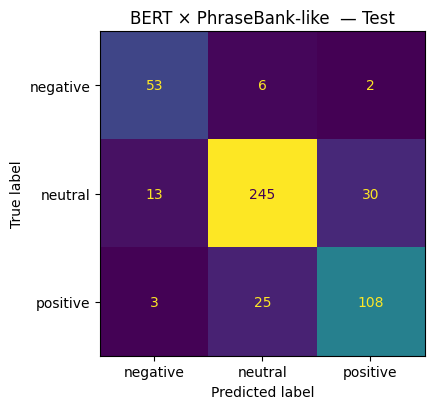

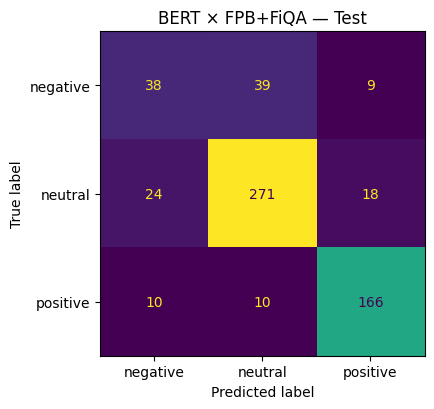

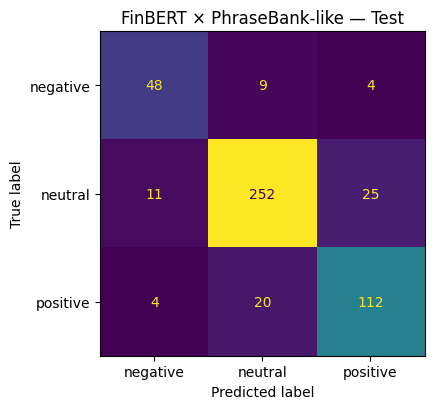

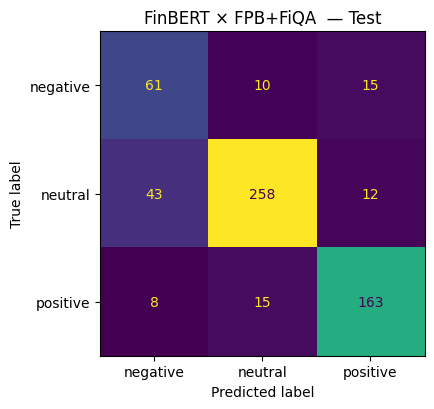

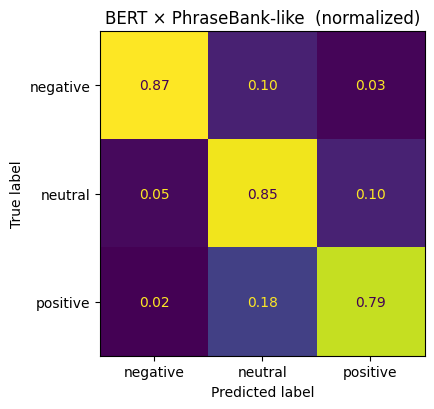

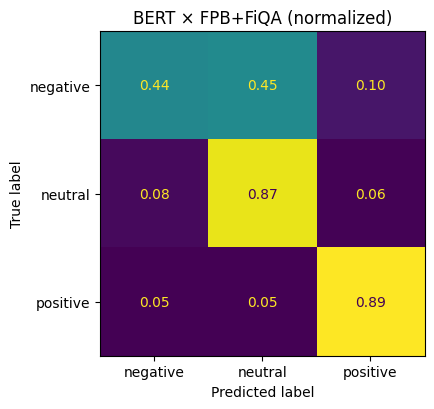

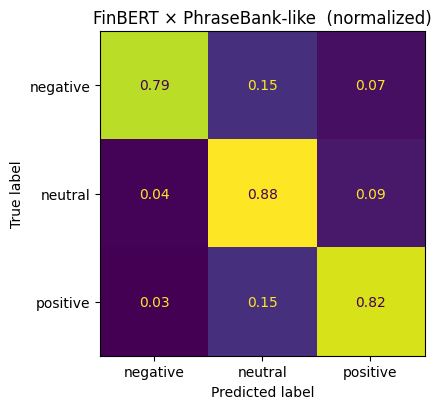

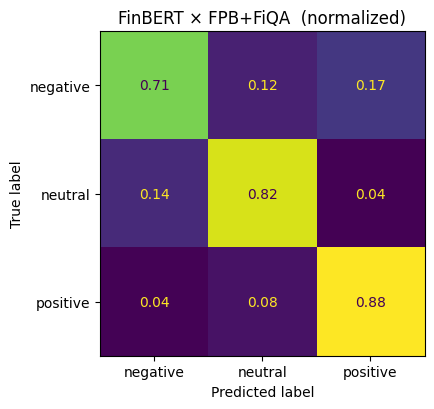

In [22]:
CLASS_NAMES = ["negative","neutral","positive"]

def plot_cm(cm, title="Confusion Matrix", normalize=False, save_path=None):
    M = cm.astype(float)
    if normalize:
        row_sums = M.sum(axis=1, keepdims=True)
        row_sums[row_sums == 0] = 1.0
        M = M / row_sums
    disp = ConfusionMatrixDisplay(confusion_matrix=M, display_labels=CLASS_NAMES)
    fig, ax = plt.subplots(figsize=(4.6, 4.2))
    disp.plot(ax=ax, values_format=".2f" if normalize else ".0f", colorbar=False)
    ax.set_title(title + (" (normalized)" if normalize else ""))
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show()


plot_cm(m1_cm, "BERT × PhraseBank-like  — Test")
plot_cm(m2_cm, "BERT × FPB+FiQA — Test")
plot_cm(m3_cm, "FinBERT × PhraseBank-like — Test")
plot_cm(m4_cm, "FinBERT × FPB+FiQA  — Test")


plot_cm(m1_cm, "BERT × PhraseBank-like ", normalize=True)
plot_cm(m2_cm, "BERT × FPB+FiQA",    normalize=True)
plot_cm(m3_cm, "FinBERT × PhraseBank-like ", normalize=True)
plot_cm(m4_cm, "FinBERT × FPB+FiQA ",    normalize=True)
